In [1]:
import subprocess
import os


result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
output = result.stdout
for line in output.splitlines():
    if '=' in line:
        var, value = line.split('=', 1)
        os.environ[var] = value

In [2]:
import os
os.environ['HF_HOME'] = '/root/autodl-tmp'

In [3]:
import pandas as pd

file_path = 'entities.tsv'
df = pd.read_csv(file_path, sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: 'entities.tsv'

In [11]:
df.loc[:,'name']

0                    obsolete sudden onset of severe chills
1                                         dry hacking cough
2                                   pulmonary consolidation
3                                                  enanthem
4                                                   anxiety
                                ...                        
814974                               IL-9 signaling pathway
814975            Complement activation - classical pathway
814976                                    Heme biosynthesis
814977    FAS pathway and stress induction of HSP regula...
814978          Hepatocyte growth factor receptor signaling
Name: name, Length: 814979, dtype: object

In [12]:
df.loc[:,'id']

0              SYMP:0000149
1              SYMP:0000259
2              SYMP:0000729
3              SYMP:0000746
4              SYMP:0000412
                ...        
814974     WikiPathways:WP8
814975    WikiPathways:WP81
814976    WikiPathways:WP86
814977    WikiPathways:WP89
814978    WikiPathways:WP94
Name: id, Length: 814979, dtype: object

In [3]:
import transformers_embedder as tre

tokenizer = tre.Tokenizer("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")

model = tre.TransformersEmbedder(
    "microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext", subword_pooling_strategy="sparse", layer_pooling_strategy="mean"
)



Some weights of the model checkpoint at microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
import torch


example = "hello hello world"

inputs = tokenizer([example, "hello hello"], return_tensors=True, padding=True)
outputs = model(**inputs)
embs = outputs.word_embeddings
torch.norm(outputs.word_embeddings[:,1])

tensor(25.1083, grad_fn=<LinalgVectorNormBackward0>)

In [29]:
inputs

{'input_ids': tensor([[   2, 3091, 6012, 3091, 6012, 4867,    3],
        [   2, 3091, 6012, 3091, 6012,    3,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0]]), 'scatter_offsets': tensor([[ 0,  1,  1,  2,  2,  3,  4],
        [ 0,  1,  1,  2,  2,  3, -1]]), 'sentence_lengths': [5, 4], 'sparse_offsets': {'sparse_indices': tensor([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 2, 2, 3, 4, 0, 1, 1, 2, 2, 3],
        [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5]]), 'sparse_values': tensor([1.0000, 0.5000, 0.5000, 0.5000, 0.5000, 1.0000, 1.0000, 1.0000, 0.5000,
        0.5000, 0.5000, 0.5000, 1.0000]), 'sparse_size': torch.Size([2, 5, 7])}}

In [33]:
inputs['sentence_lengths'], embs[0], embs[1][:4]

([5, 4],
 tensor([[ 0.1203,  0.2487, -0.1486,  ..., -0.1456,  0.3316, -0.1051],
         [-0.0856,  0.3909,  0.0588,  ..., -0.0094, -0.1266, -0.2713],
         [ 0.0517,  0.2443,  0.0853,  ...,  0.0598, -0.1438, -0.2997],
         [-0.0973, -0.0471, -0.2139,  ..., -0.3524, -0.3174, -0.2248],
         [ 0.0008, -0.0177, -0.0147,  ..., -0.0233, -0.0059, -0.0518]],
        grad_fn=<SelectBackward0>),
 tensor([[ 0.0747,  0.3440,  0.0568,  ..., -0.3278,  0.4534, -0.0326],
         [-0.1360,  0.4439,  0.1482,  ...,  0.0257, -0.1675,  0.0163],
         [ 0.0688,  0.3683,  0.1515,  ..., -0.0413, -0.0813,  0.0807],
         [ 0.0106,  0.0085, -0.0164,  ...,  0.0052, -0.0130, -0.0304]],
        grad_fn=<SliceBackward0>))

In [40]:
embs = outputs.word_embeddings
for i in range(embs.shape[0]):
    embs[i][:inputs['sentence_lengths'][i]].sum(dim=0) / inputs['sentence_lengths'][i]

tensor([-2.0152e-03,  1.6383e-01, -4.6616e-02,  3.4966e-01,  1.9546e-01,
        -5.8523e-02, -1.8699e-01,  7.4290e-02,  2.3773e-01, -1.7750e-01,
        -6.6116e-02, -1.9734e-01,  1.9792e-01, -6.5601e-03, -5.3427e-01,
        -1.9291e-03,  1.9207e-01, -3.9170e-03, -1.4562e-02,  1.3150e-01,
         2.3517e-02,  8.0770e-02,  5.3967e-02, -2.1662e-01,  1.4236e-01,
         7.4675e-02, -2.4800e-01, -2.7067e-02, -1.4002e-01,  1.6742e-02,
        -3.8091e-01,  1.4589e-01,  2.5638e-01,  1.0902e+00,  1.1738e-01,
         3.4021e-01,  3.3545e-02, -1.4539e-01,  1.3752e-01, -3.5649e-01,
         1.1106e-01, -2.1805e-01, -1.0710e-01, -4.4380e-02, -2.9830e-01,
        -3.9236e-01, -2.9471e-01, -4.2915e-02, -8.7060e-02, -5.3601e-02,
        -9.0838e-02,  9.4189e-03, -4.6059e-02, -1.3610e-01, -1.4550e-01,
        -1.1841e-01,  8.8128e-02,  1.2702e-01,  1.2624e-01,  2.1803e-01,
        -3.3179e-01, -1.3553e-01, -5.7013e-02,  7.2813e-03,  2.6262e-02,
        -4.1280e-02, -2.8696e-01, -1.0233e-01,  3.2

In [21]:
sent_vecs = embs.sum(dim=1) / embs.count_nonzero(dim=1)
sent_vecs_normalized = sent_vecs / 

In [32]:
import numpy as np
vecs = np.array(sent_vecs.detach().numpy())

In [35]:
import faiss

faiss.normalize_L2(vecs)
d = vecs.shape[1]
index = faiss.IndexFlatIP(d)

In [37]:
index.add(vecs)

In [44]:
import numpy as  np
np.array([torch.tensor([1,2,3,4]).numpy(), torch.tensor([1,2,3,4]).numpy()])

array([[1, 2, 3, 4],
       [1, 2, 3, 4]])

In [38]:
query = vecs[100]

In [42]:
k = 100
D, I = index.search(query[np.newaxis, :], k)

In [43]:
print("距离: ", D.flatten())
print("索引: ", I.flatten())

距离:  [0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 

In [8]:
import transformers_embedder as tre
import pandas as pd


tokenizer = tre.Tokenizer("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")

model = tre.TransformersEmbedder(
    "microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext", subword_pooling_strategy="sparse", layer_pooling_strategy="mean"
)


file_path = 'entities.tsv'
df = pd.read_csv(file_path, sep='\t')

Some weights of the model checkpoint at microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/tmp/ipykernel_1007/1121646524.py:13: DtypeWarning: Columns (6,8) have mixed ty

In [4]:
names = df.loc[:,'name'].to_list()
len(names)

581176

In [ ]:
inputs = tokenizer(names[:5000], return_tensors=True, padding=True)
outputs = model(**inputs)

In [10]:
import pandas as pd

file_path = 'entities.tsv'
df = pd.read_csv(file_path, sep='\t')
names = df.loc[:,'name'].to_list()

/tmp/ipykernel_1007/3637672984.py:4: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')


In [17]:
lens = [len(name.split()) for name in names]

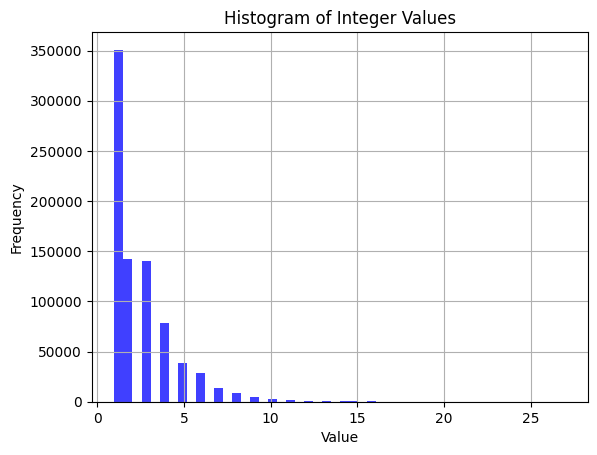

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Example list of integers
data = lens[:] # Generating a sample list of integers

# Plotting the histogram
plt.hist(data, bins=50, alpha=0.75, color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Integer Values')
plt.grid(True)
plt.show()

In [40]:
len(names)

814979

In [13]:
import gc

chunk_len = 1000

for i in range(1, 27+1):
    l = [name for j, name in enumerate(names) if len(name.split()) == i]
    idx = [j for j, name in enumerate(names) if len(name.split()) == i]
    print(len(l))
    for j in range(len(l) // chunk_len):
        inputs = tokenizer(l[j*chunk_len:(j+1)*chunk_len], return_tensors=True, padding=True)
        outputs = model(**inputs)
        print(outputs.word_embeddings.shape)
        del inputs
        del outputs
        gc.collect()

350789
torch.Size([1000, 7, 768])
torch.Size([1000, 11, 768])
torch.Size([1000, 11, 768])
torch.Size([1000, 106, 768])
torch.Size([1000, 122, 768])
torch.Size([1000, 42, 768])
torch.Size([1000, 36, 768])
torch.Size([1000, 56, 768])
torch.Size([1000, 53, 768])
torch.Size([1000, 39, 768])
torch.Size([1000, 7, 768])
torch.Size([1000, 54, 768])
torch.Size([1000, 49, 768])


KeyboardInterrupt: 

In [18]:
import gc

chunk_len = 1000

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# tokenizer = tokenizer.to(device)
model = model.to(device)

for j in range(len(names) // chunk_len):
    inputs = tokenizer(names[j*chunk_len:(j+1)*chunk_len], return_tensors=True, padding=True).to(device)
    outputs = model(**inputs).detach()
    print(outputs.word_embeddings.shape)
    del inputs
    del outputs
    gc.collect()

OutOfMemoryError: CUDA out of memory. Tried to allocate 42.00 MiB (GPU 0; 23.65 GiB total capacity; 22.70 GiB already allocated; 6.06 MiB free; 23.19 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [24]:
# del tokenizer
# del model
torch.cuda.empty_cache()
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 2            |        cudaMalloc retries: 6         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  23200 MiB |  23241 MiB | 555638 MiB | 532438 MiB |
|       from large pool |  23190 MiB |  23231 MiB | 553713 MiB | 530522 MiB |
|       from small pool |      9 MiB |     10 MiB |   1925 MiB |   1915 MiB |
|---------------------------------------------------------------------------|
| Active memory         |  23200 MiB |  23241 MiB | 555638 MiB | 532438 MiB |
|       from large pool |  23190 MiB |  23231 MiB | 553713 MiB |

In [32]:
a = list(range(13))

In [34]:
a[10:999]

[10, 11, 12]